In [25]:
#-------------------------------------------------------------
#-------------------------------------------------------------

#M544 Final Project
#Created by Andrew Masur, Saul Hernadez, Jack Valian


#Note: Reference(#) refer to comment index at end of project

#-------------------------------------------------------------
#-------------------------------------------------------------

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sbn

# Scikit-learn
from sklearn.linear_model import LinearRegression   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering



In [26]:
#------------
#Reference(3)
#------------



# -1 = False/No
# 0 = Suspicious/Inconclusive
# 1 = True/Yes
data = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data[0])
df = df.astype(int)
df.head()

having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_registeration_length  Favicon  ...  popUpWidnow  Iframe  \
0                           -1        1  ...            1       1   
1                           -1        1  ...            1       1   
2                           -1        1  ...            1       1   
3                            1        1  ...            1       1   
4                           -1        1  ...           -1       1   

   age_of_domain  DNSRecord  web_traffic  Page_Rank  Google_Index  \
0             -1         -1           -1         -1             1   
1             -1         -1            0         -1             1   
2              1         -1            1         -1             1   
3             -1         -1            1         -1             1   
4             -1         -1            0         -1             1   

   Links_pointing_to_page  Statistical_report  Result  
0                       1                  -1      -1  
1                       1                   1      -1  
2                       0                  -1      -1  
3                      -1                   1      -1  
4                       1                   1       1  

[5 rows x 31 columns]

In the above code, we are loading the data into a dataframe and setting the dataframe as an integer so it is easier to manipulate and compute the data. The source where we grabbed the data was very unclear, but we have determined that this is a classification problem where a 1 represents a "true" phishing attempt, 0 represents a suspicious or inconclusive phishing attempt, and -1 represents an email which is not a phishing attempt.

In [27]:
df_corr = df.corr()
corr =df_corr.values


C:\Users\Saul\AppData\Local\Temp/ipykernel_48492/2004947542.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

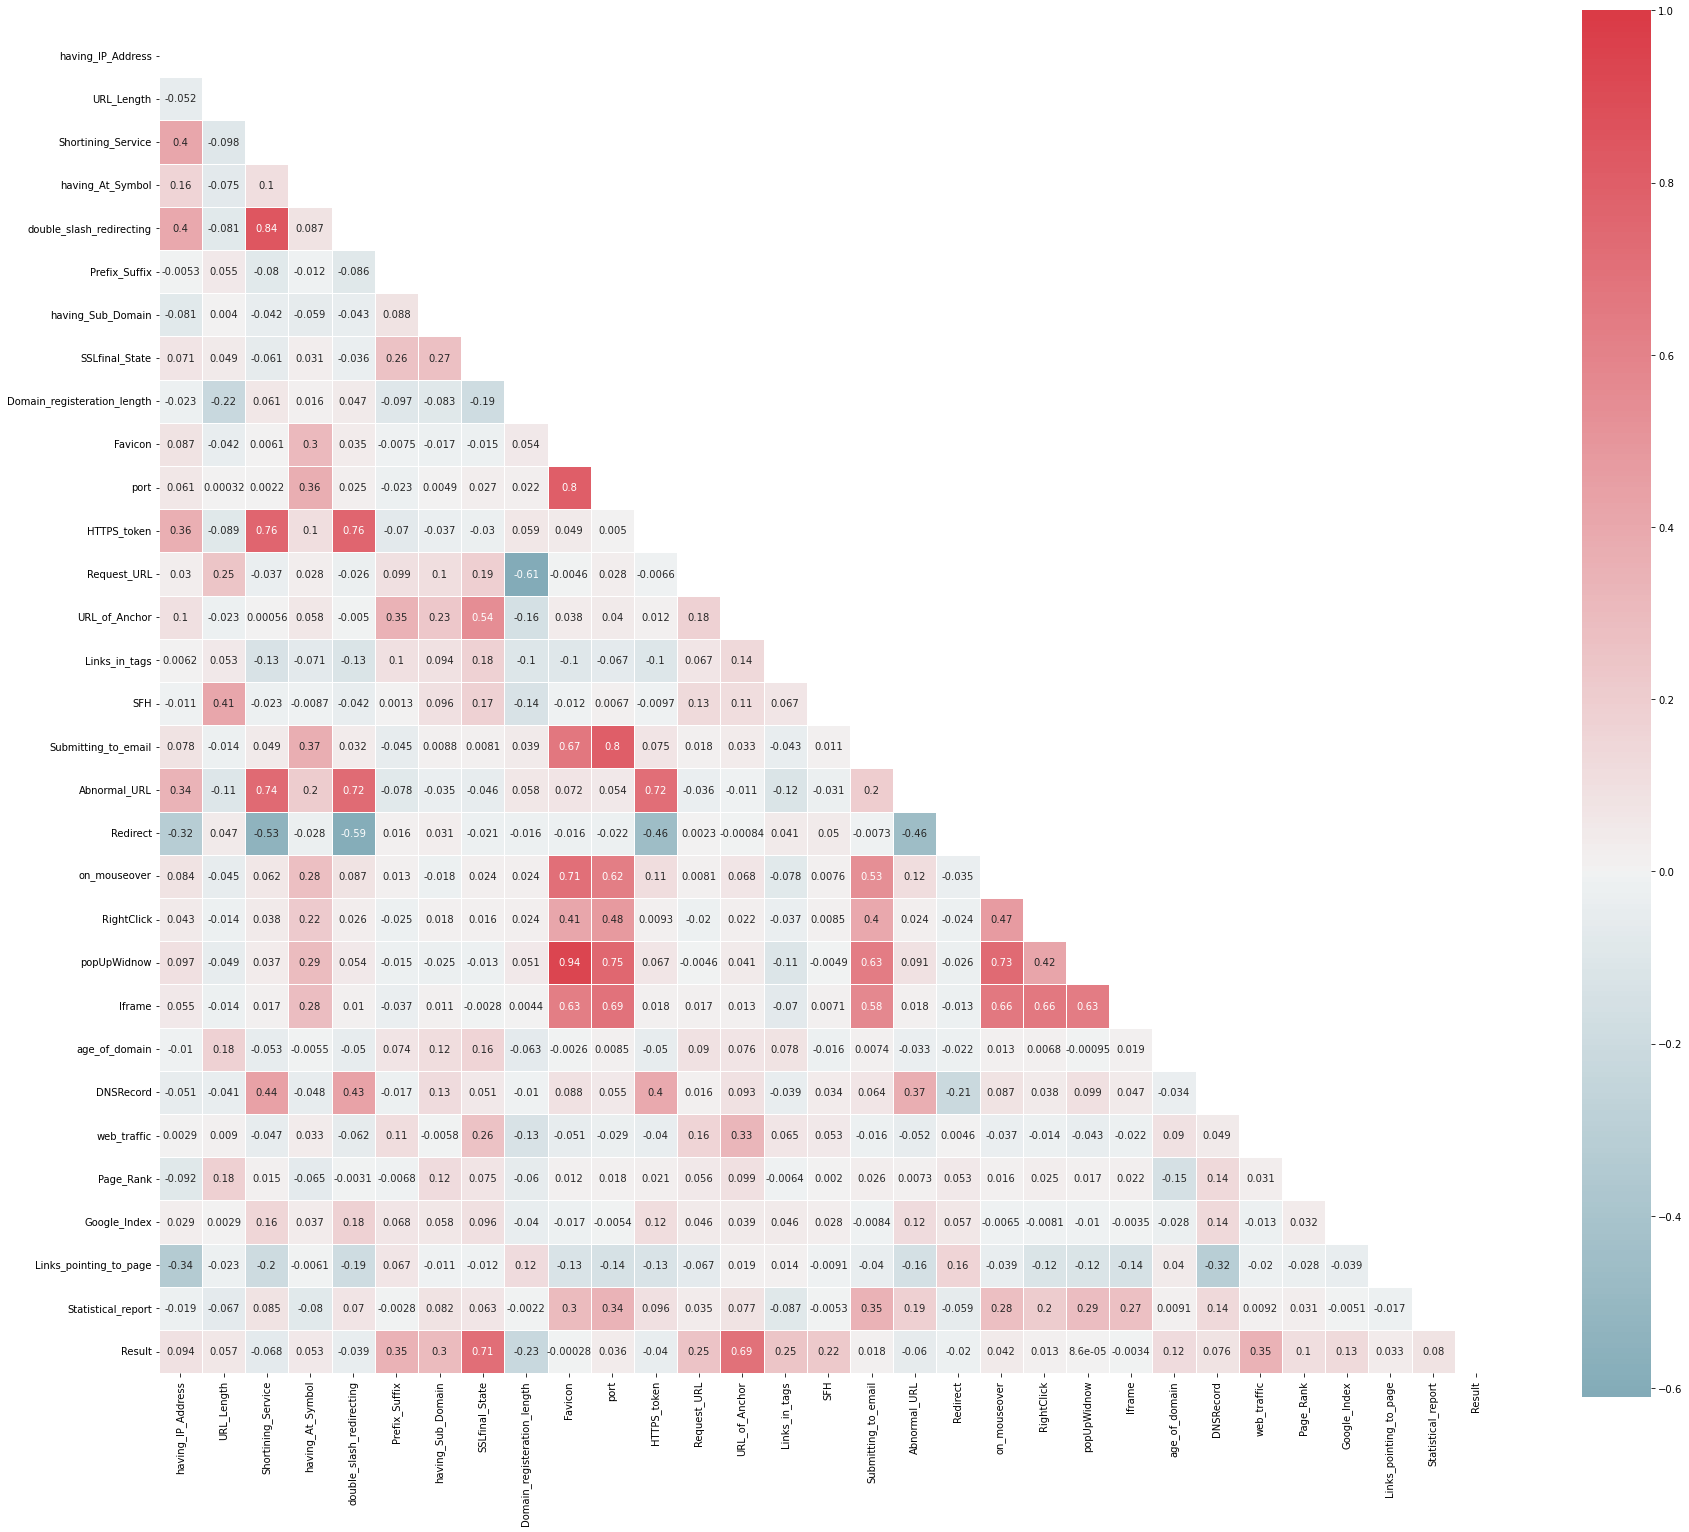

In [28]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=0.5, annot = True, annot_kws={"size":10}, cbar_kws={"shrink": 0.85})

We wanted to understand the correlation between each element so we found the correlation matrix of the dataframe and then plotted that using seaborn. From the above plot, you can tell that there is a lot of correlated elements in the data. Some of the more correlated elements are highlighted below for a more clear picture: 

double slash redirecting & shortening service: 0.84 <br>
port & favicon: 0.8 <br>
pop up window & faviocon: 0.94 <br>
submitting to email & port: 0.8 <br>
<br>
Multicollinearity is defined as the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. This creates a problem in a multiple regression because the inputs are all influencing each other. Therefore, they are not actually independent, and it is difficult to test how much the combination of the independent variables affects the dependent variable, or outcome, within the regression model.

From the correlations highlighted above and visually in the plot, we could tell that this would be an issue when modeling the data.

In [29]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                        for i in range(len(df.columns))]

vif_data

feature        VIF
0             having_IP_Address   1.936163
1                    URL_Length   2.526519
2            Shortining_Service   9.878833
3              having_At_Symbol   2.791475
4      double_slash_redirecting  10.639575
5                 Prefix_Suffix   2.420501
6             having_Sub_Domain   1.204401
7                SSLfinal_State   2.256701
8   Domain_registeration_length   1.838384
9                       Favicon  17.988731
10                         port  11.348737
11                  HTTPS_token   5.599084
12                  Request_URL   1.758462
13                URL_of_Anchor   2.118850
14                Links_in_tags   1.152566
15                          SFH   2.098251
16          Submitting_to_email   5.510860
17                 Abnormal_URL   6.287173
18                     Redirect   1.734960
19                 on_mouseover   6.368778
20                   RightClick   8.718541
21                  popUpWidnow  15.260179
22                       Iframe   8.979644
23                age_of_domain   1.168084
24                    DNSRecord   2.083471
25                  web_traffic   1.342184
26                    Page_Rank   1.491761
27                 Google_Index   2.301655
28       Links_pointing_to_page   1.884608
29           Statistical_report   2.798512
30                       Result   3.407628

To stress the issue of multicollinearity, we decided find the variance inflation factor or VIF of each data element. The VIF is a measure of the amount of multicollinearity in a set of multiple regression variables and the higher the VIF, the more collinear the elements are with the rest of the data. As you can see above, 11/31 features have a VIF of 5 or higher and almost all have a VIF of 2 or higher which tells us there is a very high measure if multicollinearity.

In [30]:
data_mat = df.values

X = data_mat[:,0:-1]
y = data_mat[:,-1]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

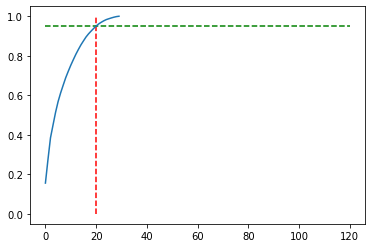

In [31]:
#Decide the number of PCA components based on the retained information
pca = PCA()
pca.fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)


For this visual we fit our data set into a mock training set. After fitting the training set with PCA and setting our explained variance to meet requirements of a depth of 0.95, we found out the optimal number of componets to have after normalizing our data to be about 20 componets. Before we actually just set our number of componets to about 2 or 3 and tested our scores using those and came out with pretty poor results but after the change our accurary in our training and testing set almost doubled.

In [32]:
#------------
#Reference(5)
#------------

scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
# Normalizing the Data 
X_normalized = normalize(X_train_n) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
final_pca = PCA(n_components = 20) 
X_principal = final_pca.fit_transform(X_train) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3', 'P4', 'P5','P6', 'P7', 'P8','P9', 'P10', 'P11','P12', 'P13', 'P14','P15', 'P16', 'P17','P18', 'P19', 'P20'] 
X_principal.head()

P1        P2        P3        P4        P5        P6        P7  \
0 -0.281071  1.133124 -0.995821  1.698052 -1.026327 -0.070329  1.936775   
1  1.173902  3.817851  1.491102  0.201248 -1.219184 -0.925516  0.820416   
2 -1.056487  1.031136 -1.942488 -0.839432 -0.072891  0.490470  1.091858   
3 -1.239765  0.320388 -1.488998  0.931624 -0.649362 -1.523974  0.165294   
4  5.798502  0.406340  2.133023 -1.209074 -0.047336  0.226147 -0.673615   

         P8        P9       P10       P11       P12       P13       P14  \
0 -1.244125 -0.846512  0.868488  0.345311 -1.045580 -0.308162 -0.201353   
1  0.402773  2.104933 -0.159156 -0.189054 -0.342922 -0.043307 -0.645469   
2  0.850955  1.696748  0.396731  0.099677 -0.347504  0.136386 -0.093140   
3  1.127162  0.036884  0.432599 -0.164207 -0.227393 -0.065874 -0.049513   
4  0.762036  0.213577  1.074378 -1.097972  1.237573 -0.012077 -0.194619   

        P15       P16       P17       P18       P19       P20  
0  0.034089  0.588502  0.364502  0.462691  0.693351  0.365439  
1 -0.574526  0.300248 -0.145370  0.089096  0.148132  0.316118  
2 -0.374391  0.158816 -0.234103 -0.449056  0.202418  0.659344  
3 -0.662690  0.257539 -0.004327 -0.916986  0.033858 -0.002383  
4 -0.284469 -0.935533 -0.021214 -0.672622  1.284455 -0.529978

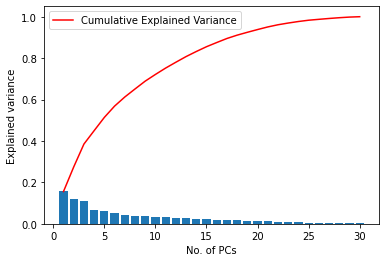

In [33]:
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('No. of PCs')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

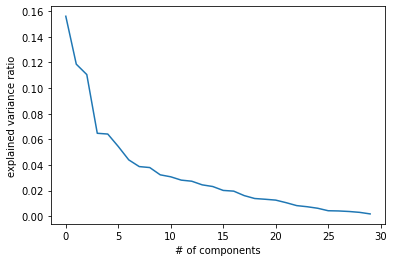

In [34]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# of components')
plt.ylabel('explained variance ratio')
plt.show()

This two visuals above show the impact of which each PCA componet has on our explained variance ratio results. It is expected for the first couple of componets to carry the heaviest value towards the explained variance ratio. As you move futher away and increase the number of componets, the value of the explained ratio converges closer and closer to zero. Adding more componets would have little to no affect on improving our training and test averages due to the fact that their explained variance values would be near to nothing.

In [35]:
X_principal_corr = X_principal.corr()
X_corr = X_principal_corr.values

C:\Users\Saul\AppData\Local\Temp/ipykernel_48492/2170446907.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(X_corr, dtype=np.bool)


<AxesSubplot:>

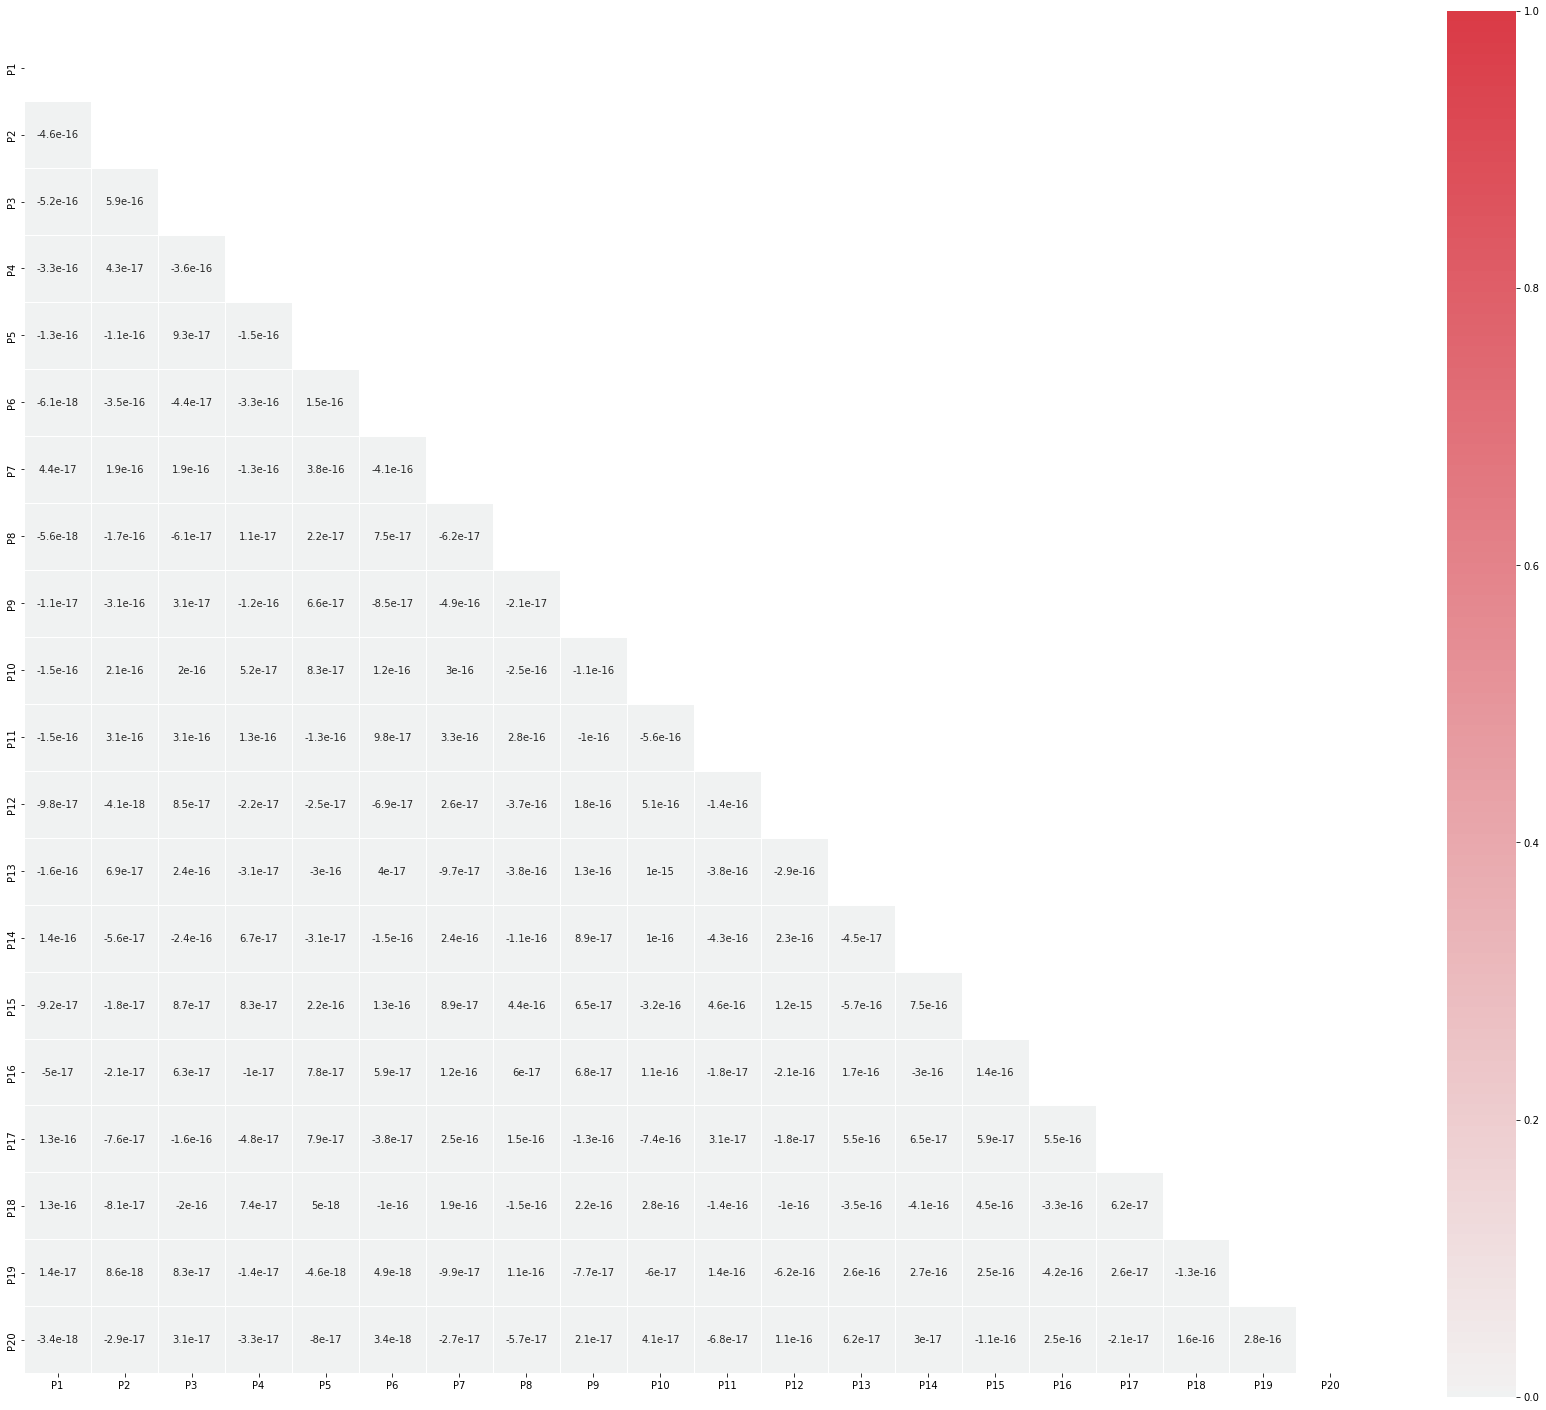

In [36]:
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(X_principal_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=0.5, annot = True, annot_kws={"size":10}, cbar_kws={"shrink": 0.85})

In [37]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_principal.columns
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_principal.values, i) 
                        for i in range(len(X_principal.columns))]

vif_data

feature  VIF
0       P1  1.0
1       P2  1.0
2       P3  1.0
3       P4  1.0
4       P5  1.0
5       P6  1.0
6       P7  1.0
7       P8  1.0
8       P9  1.0
9      P10  1.0
10     P11  1.0
11     P12  1.0
12     P13  1.0
13     P14  1.0
14     P15  1.0
15     P16  1.0
16     P17  1.0
17     P18  1.0
18     P19  1.0
19     P20  1.0

Multicollinearity as I stated earlier affects the performance of regression and classification models. PCA  takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables. After running the PCA with 20 componenets we have successfully performed dimensionality reduction as the new shape of the matrix is now only 20 columns. As seen in the correlation matrix image above and the new VIF table above the data no longer has multicollinearity and is a completely uncorrelated matrix that can now be used in a logistic regression.

In [38]:
X_test_n = final_pca.transform(X_test)

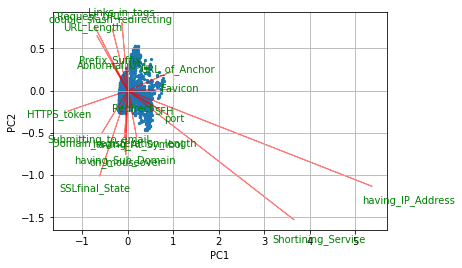

<Figure size 3600x3600 with 0 Axes>

In [39]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(X_test_n[:,0:2],np.transpose(X_test_n[0:2, :]),list(df.columns))
plt.figure(figsize =(50, 50))
plt.show() 

To determine the relationship between the features and the first two principal components we have created this biplot seen above. We can conclude from this biplot that having_IP_Address and Shortening_Service are very important to the first principal component. Likewise, they are negatively very important for the second principal component as well.

In [40]:
lrc = LogisticRegression(max_iter=10000)
lrc.fit(X_principal, y_train)

LogisticRegression(max_iter=10000)

In [41]:
#------------
#Reference(4)
#------------


# Printing Train and Test Accuaracy 
print ("Train Accuracy: "+ str(100 * lrc.score(X_principal, y_train)))
print ("Test Accuracy: "+ str(100 * lrc.score(X_test_n, y_test)))

Train Accuracy: 92.51744636857069
Test Accuracy: 92.1615917998191


We previously created a logistic regression for the data prior to running PCA on it, but this returned Training and Test Accuracies of about 40%. As you can see, by lowering the correlation between variables, we were able to acheive an accuracy of above 90%.

In [42]:
y_pred = lrc.predict(X_test_n)

In [43]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print(class_report)

Confusion Matrix:
 [[1351  148]
 [ 112 1706]]
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      1499
           1       0.92      0.94      0.93      1818

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



By looking at the confusion matrix, it can be seen that our model successfully predicted the test data 92% of the time (3057 out of 3317), however one issue with this form of analysis is the model is not replicable to external data. In other words, we are unable to apply the model to, say, a random website that we are attempting to identify as a phishing attempt or not.

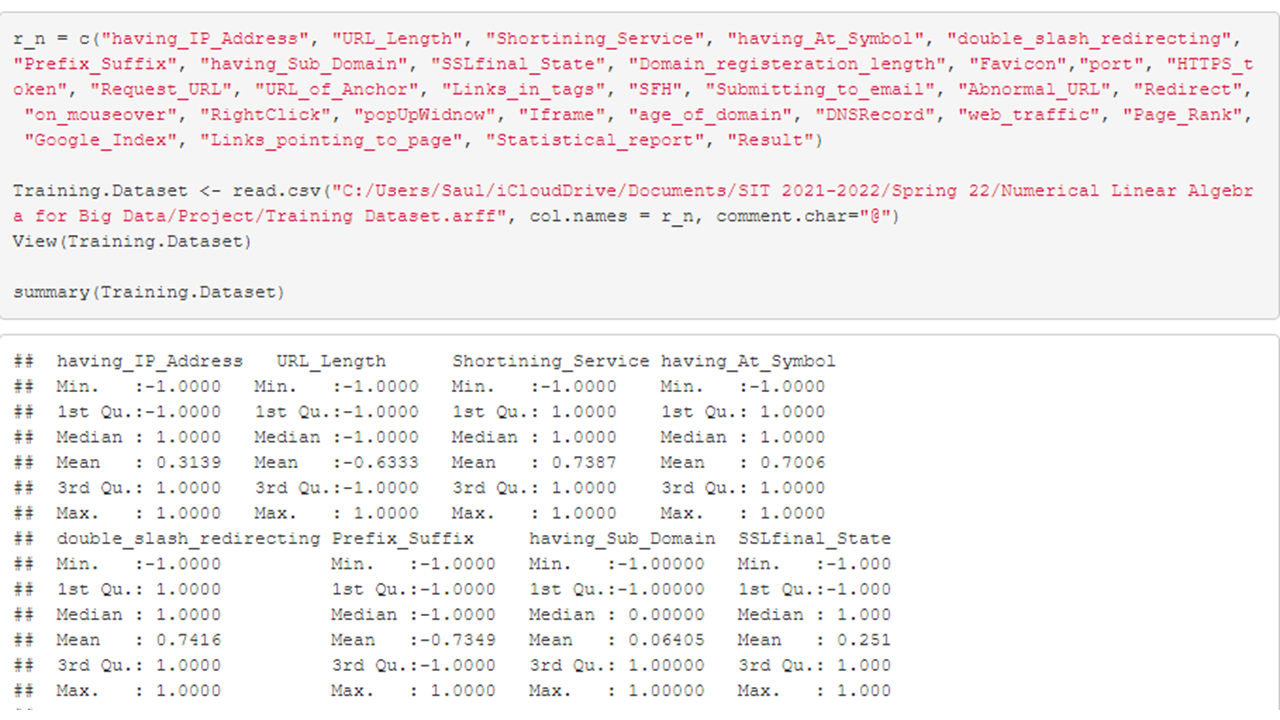

In [44]:
Image("Images/Presentation1.png")

A regression was thus created in R, which allows for more flexibility than Python in this regard. We ran into the issue that the data contained 1, -1, and 0 instead of just 1 and zero, which would not allow the glm function to create the regression that calculated probabilities.

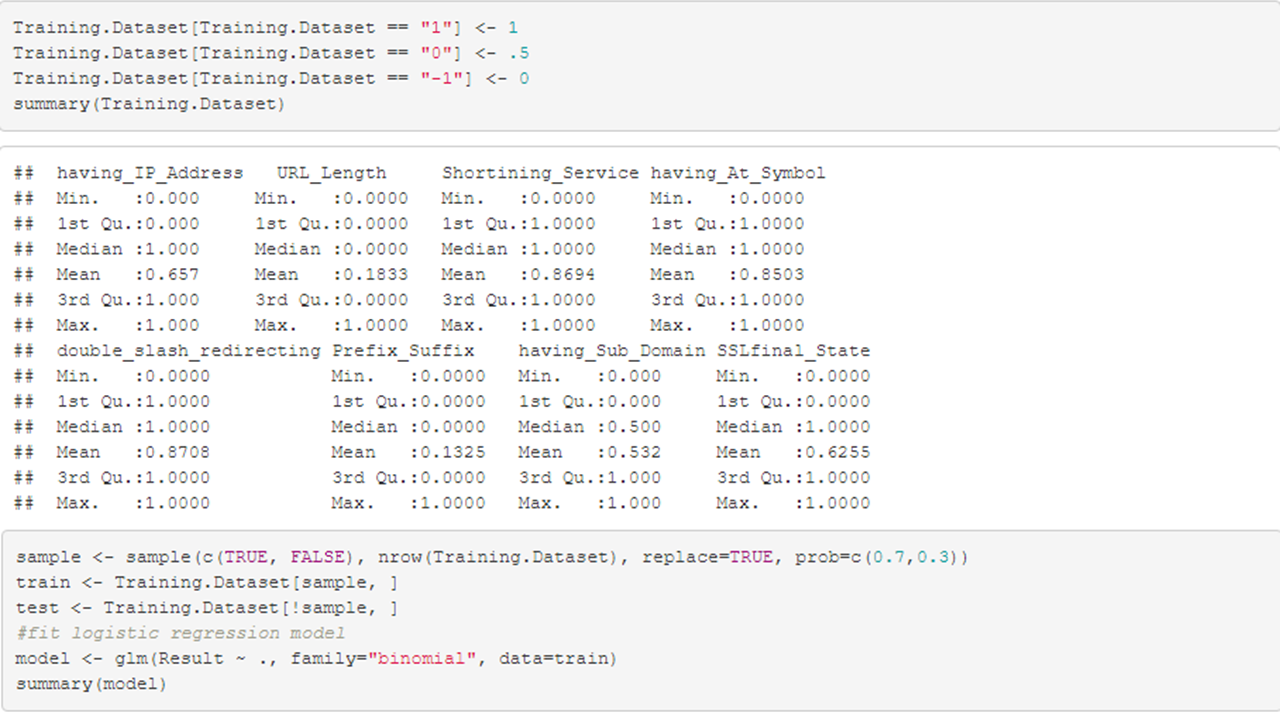

In [45]:
Image("Images/Presentation2.png")

The data was adjusted as shown above, to instead swap 0 for 0.5 (equally likely phishing as not) and -1 for 0 (not phishing). This was done in this order to avoid double changing variables.

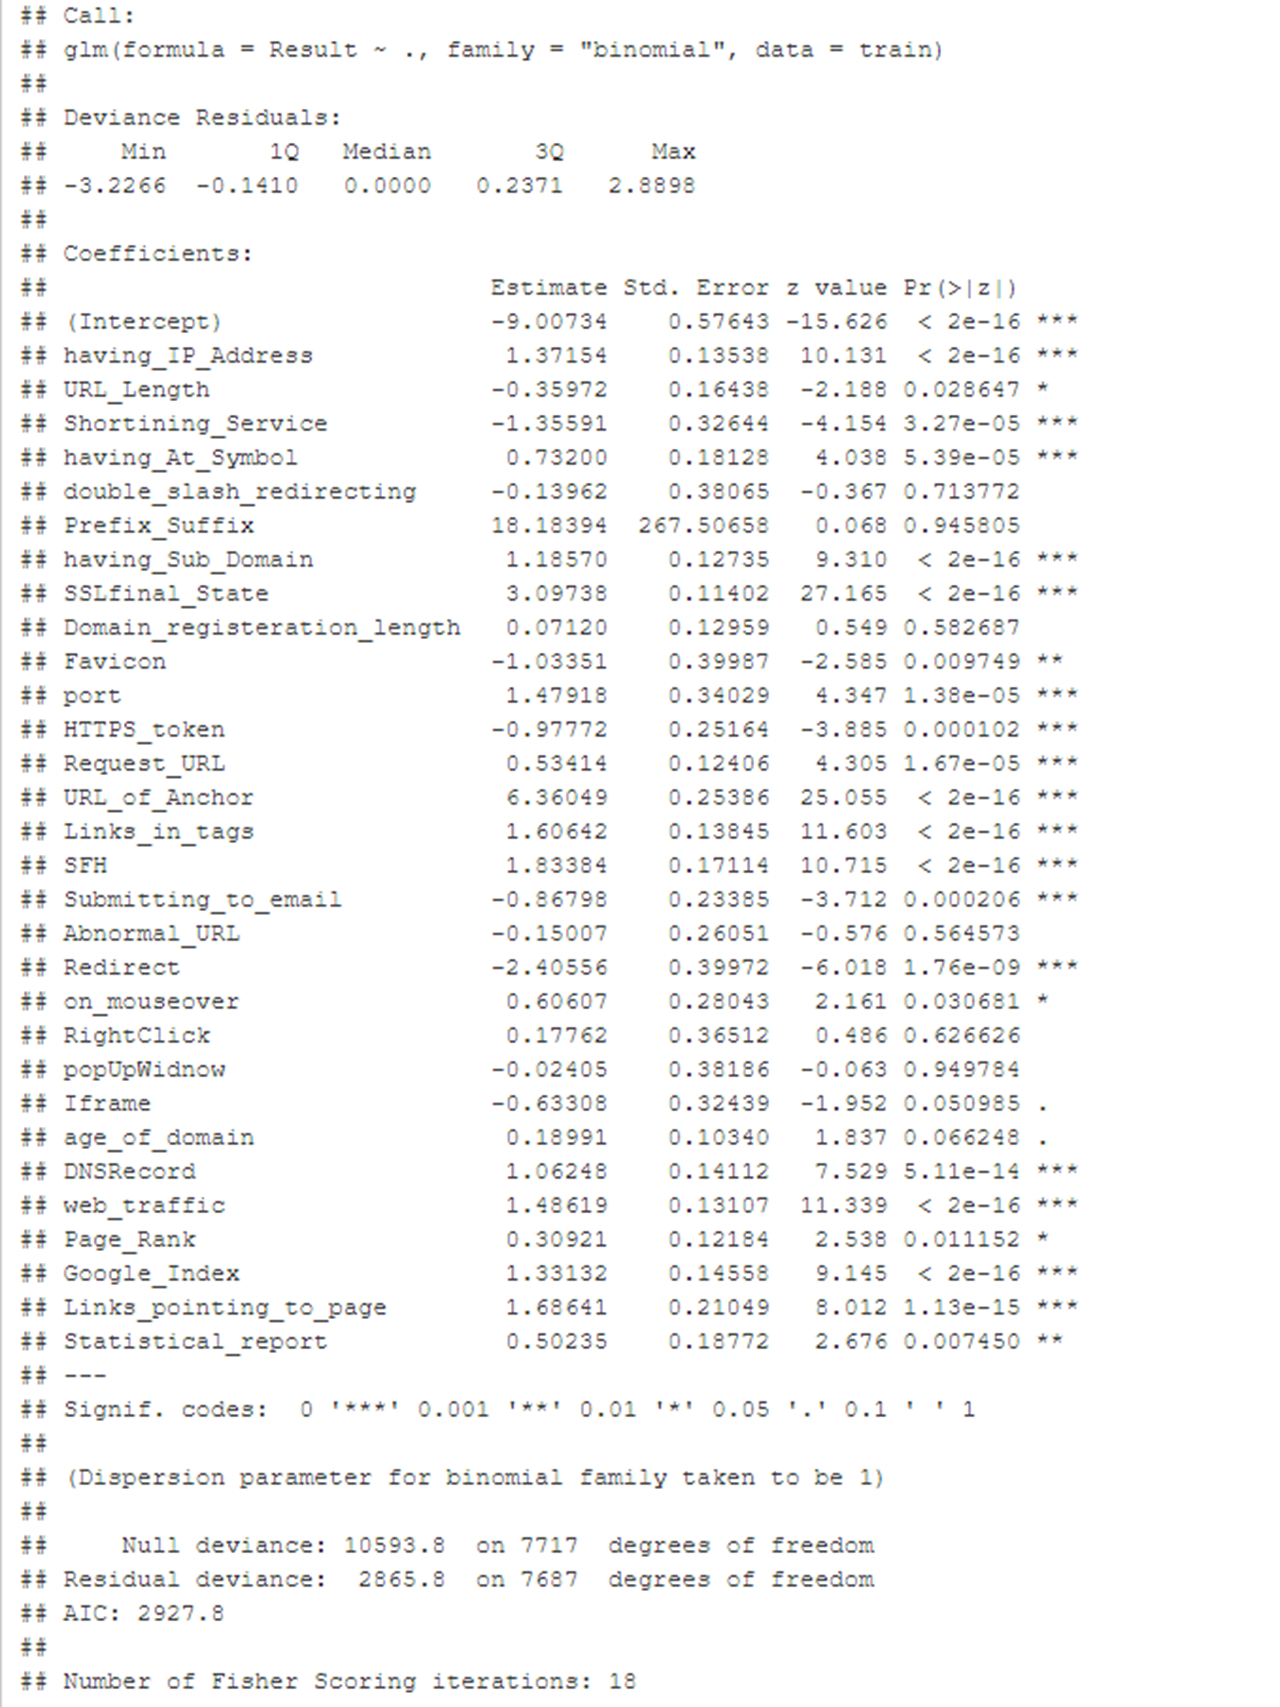

In [46]:
Image("Images/Presentation3.png")

When the summary of the produced logistic regression was output, we saw that many variables were not significant to the data, such as Prefix_Suffix and popUpWindow.

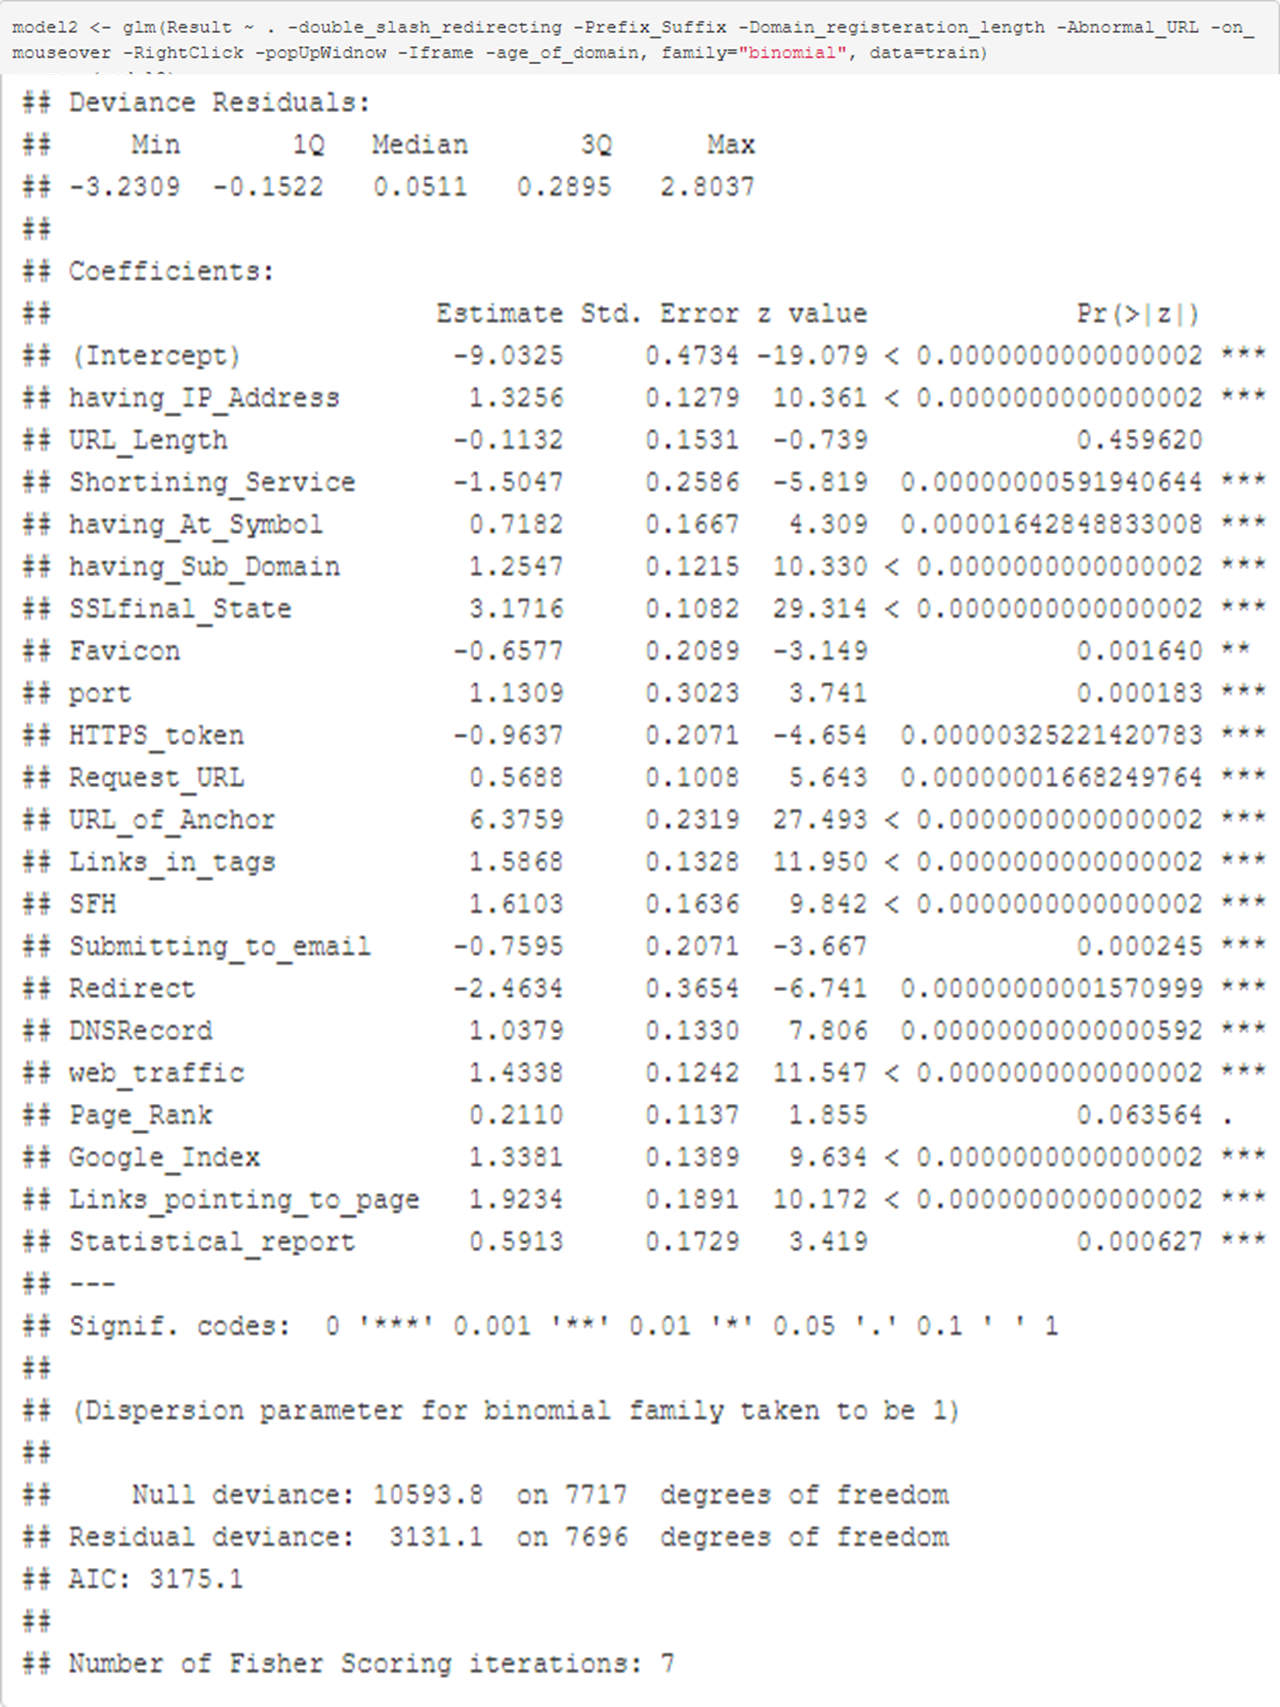

In [47]:
Image("Images/Presentation4.png")

These were removed and the model was created again, showing more insignificant variables.

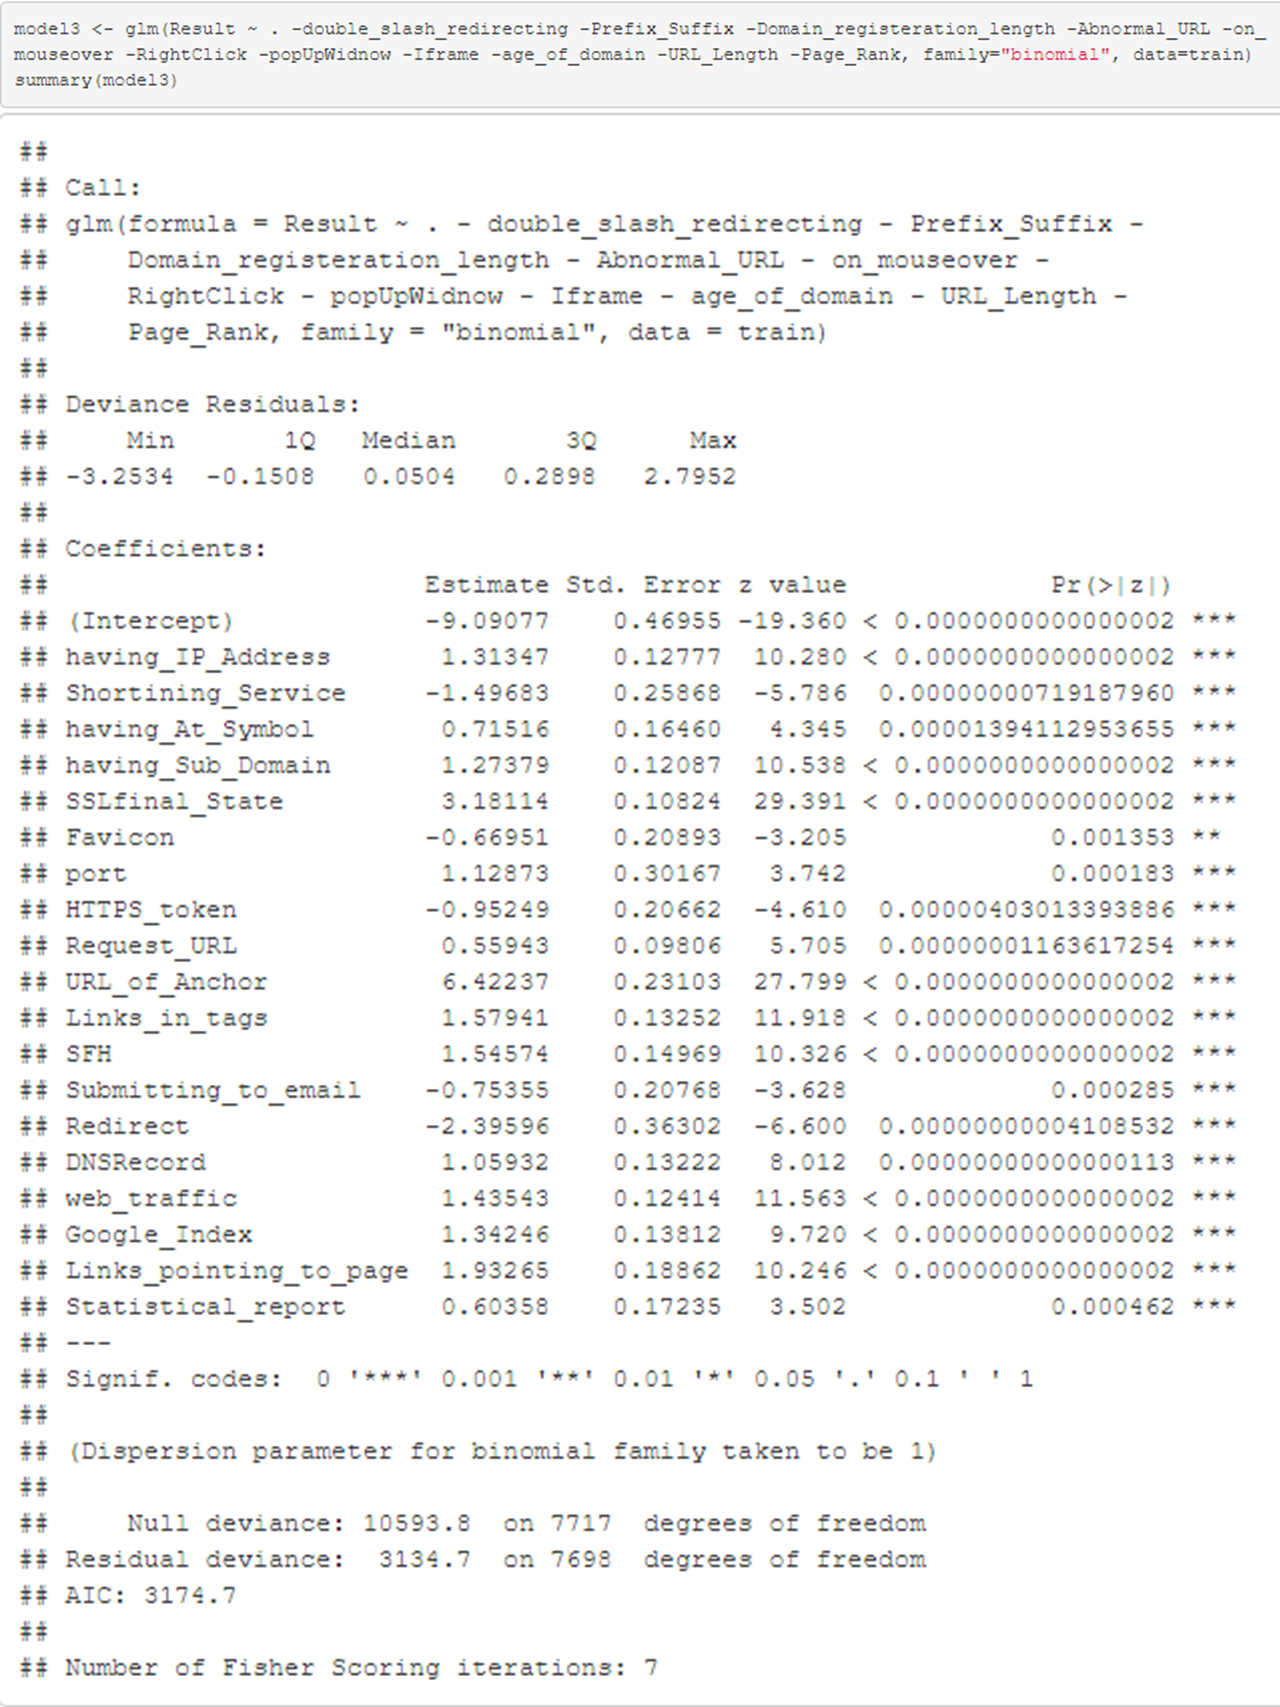

In [48]:
Image("Images/Presentation5.png")

When removed, the final model had strictly variables with a 0.01 significance level, or 99% confidence. However, we ended with a higher AIC than that of the first model, indicating we have only made a worse fitting model. Likely, the method of logistic regression we created was inefficient, as reca

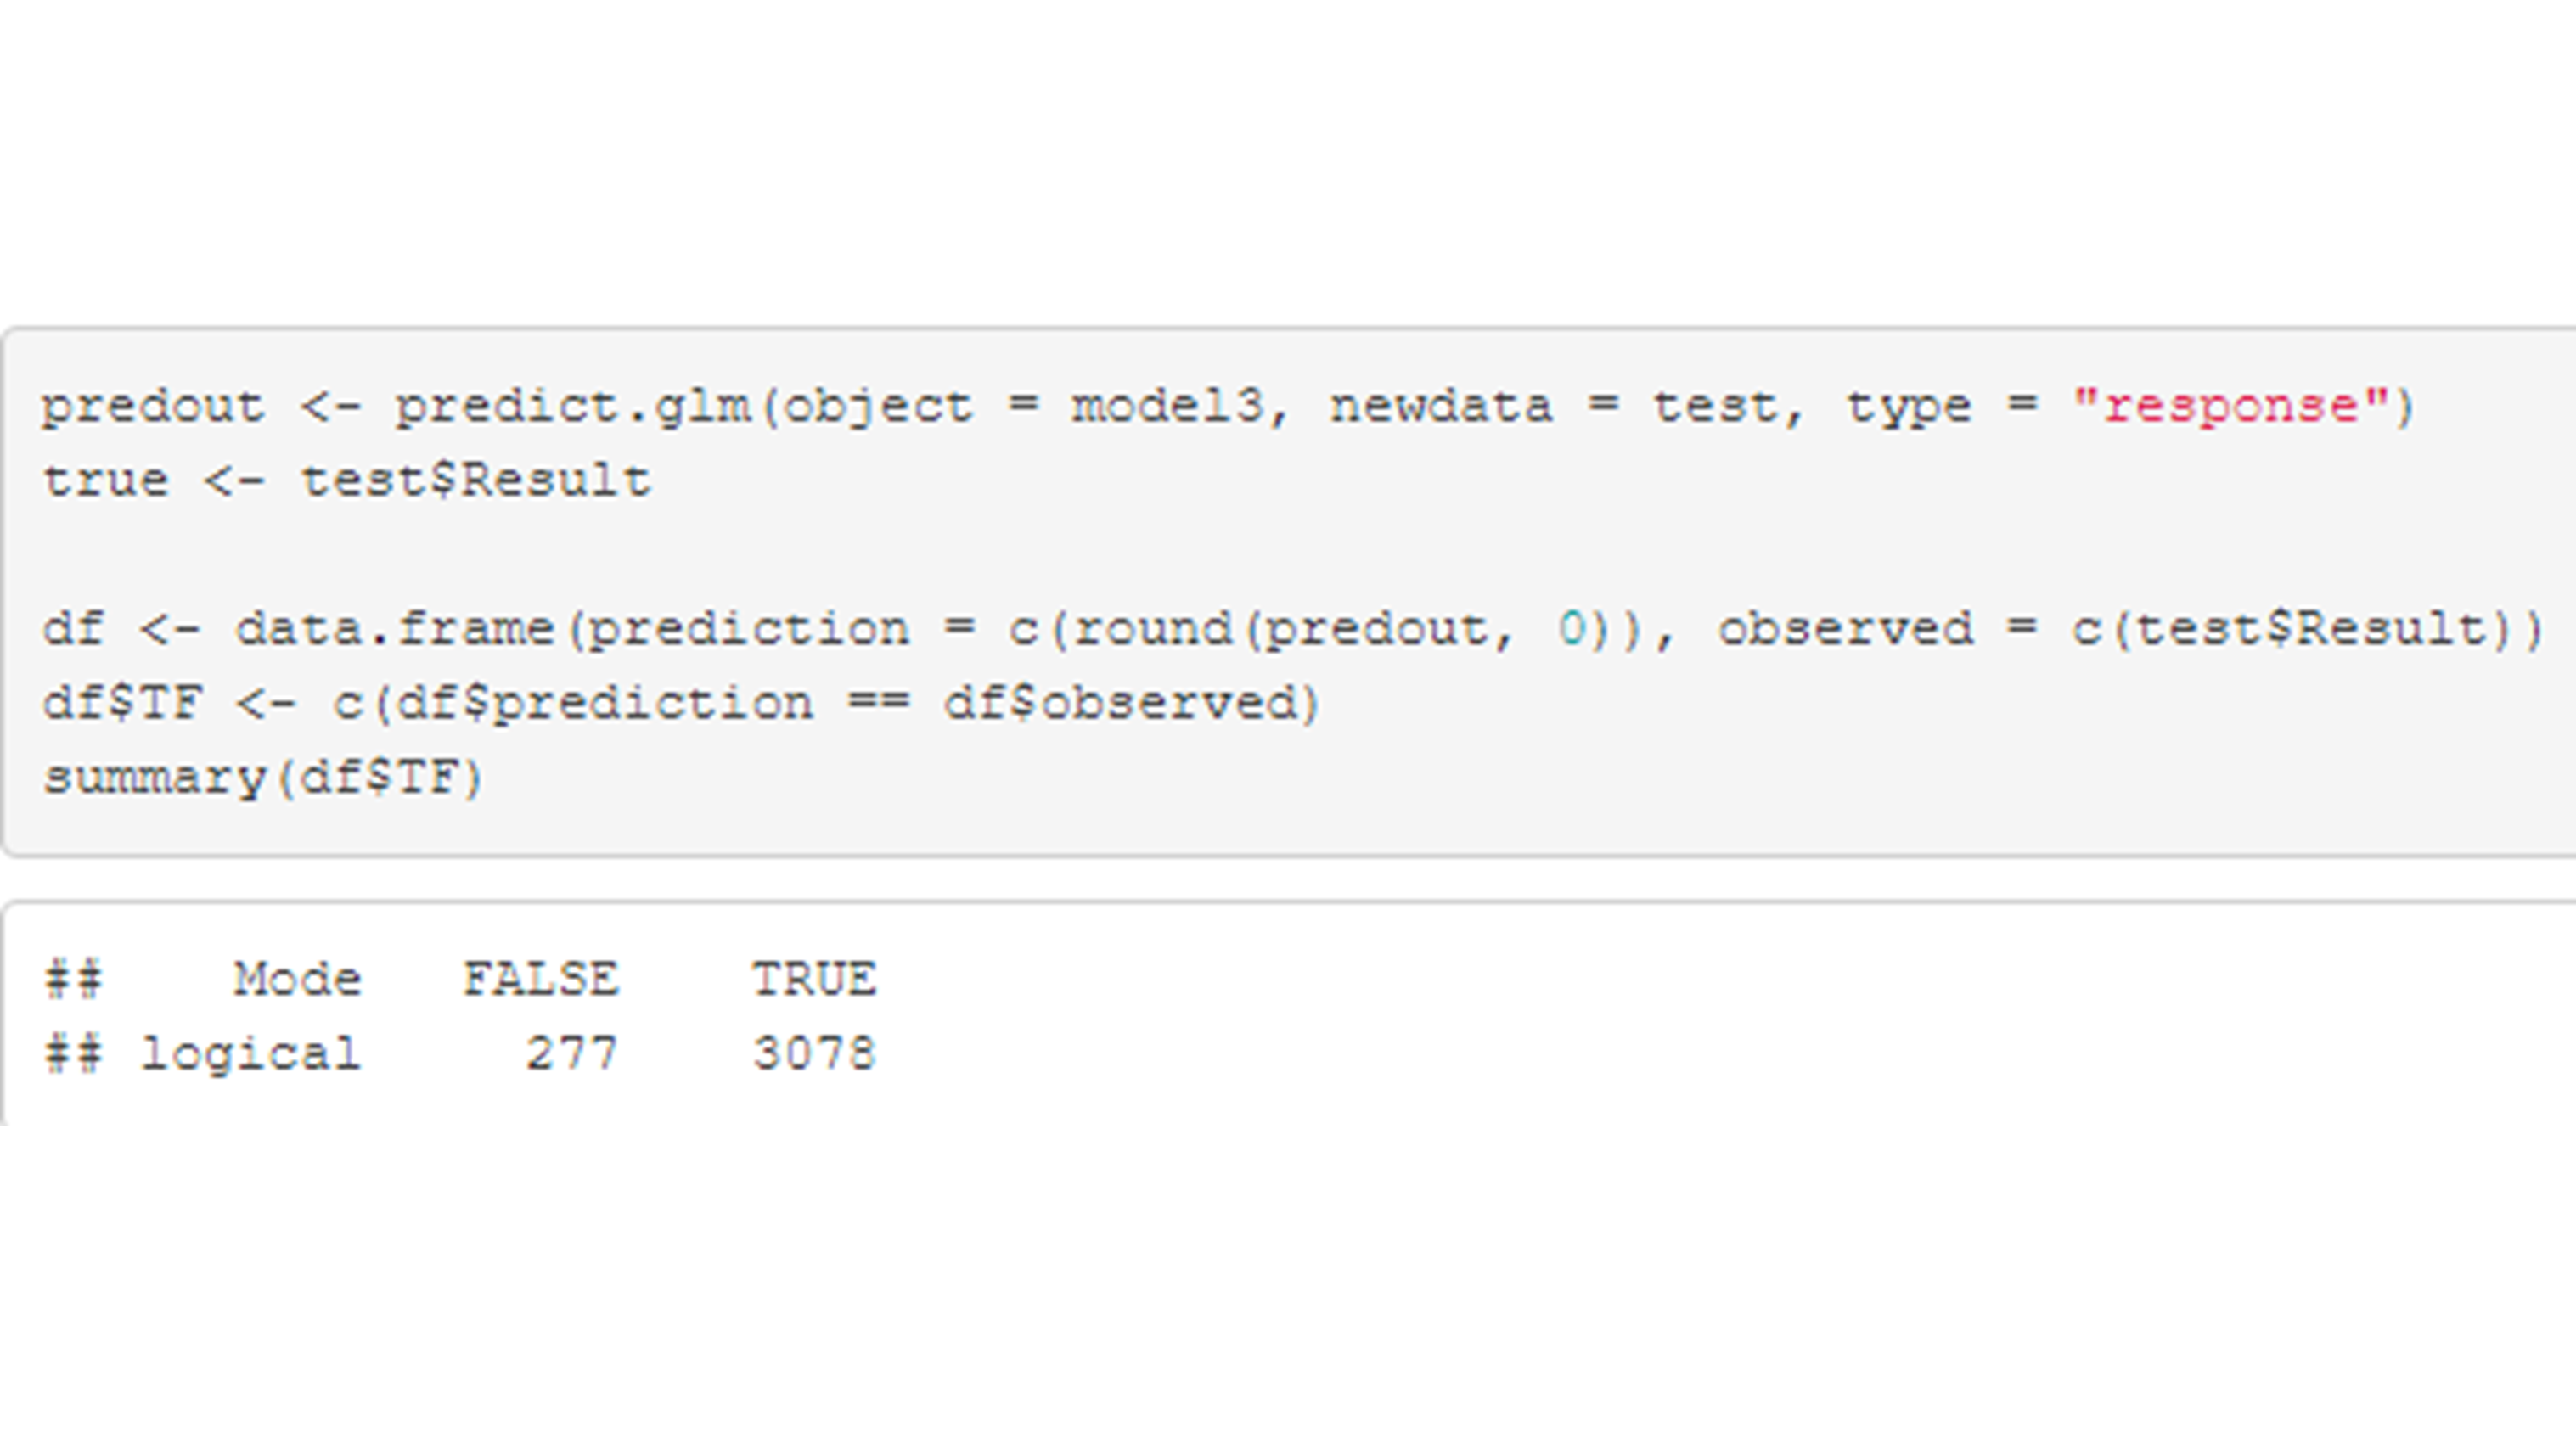

In [63]:
Image("Images/Presentation7.png")

The data was then compared to the separated test data. While we do not have a confusion matrix for the performance, we found that our regression correctly predicted whether a website was a phishing attempt ~92% of the time. This is just as accurate as the model created in python, but it is replicable for external data.

In [50]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lrc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print(scores)

Accuracy: 0.928 (0.009)
[0.92405063 0.92224231 0.93128391 0.91229656 0.92947559 0.91855204
 0.94660633 0.93846154 0.93122172 0.92307692]


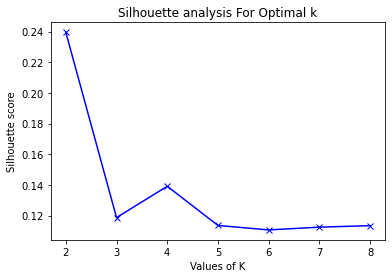

In [51]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_principal)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X_principal, cluster_labels))


plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [52]:
n_cl = 3
km = KMeans(n_clusters=n_cl, max_iter=10000, tol=0.000001, init='random', n_init=20)

In [53]:
km.fit(X_principal)

KMeans(init='random', max_iter=10000, n_clusters=3, n_init=20, tol=1e-06)

In [54]:
cs = np.round(km.cluster_centers_, 3)
y_km = km.predict(X_principal)

print(cs)

[[ 3.000e+00 -1.236e+00 -8.800e-01 -3.300e-02  6.000e-02  1.800e-02
  -1.000e-03  4.900e-02  8.000e-03 -1.300e-01  6.000e-03  6.000e-03
  -1.100e-02 -1.000e-03 -2.700e-02  2.000e-03 -8.900e-02 -1.100e-02
  -3.600e-02  1.400e-02]
 [-8.620e-01 -1.520e-01 -7.600e-02 -5.000e-03 -2.300e-02  2.600e-02
   1.100e-02 -8.000e-03  1.000e-03  1.500e-02 -2.100e-02 -1.300e-02
  -1.500e-02  1.000e-02  1.500e-02 -3.000e-03  3.900e-02  1.100e-02
   1.200e-02  0.000e+00]
 [ 1.528e+00  2.855e+00  1.809e+00  8.500e-02  6.900e-02 -2.080e-01
  -7.600e-02 -1.700e-02 -1.800e-02  9.000e-02  1.380e-01  7.900e-02
   1.210e-01 -6.500e-02 -6.500e-02  2.100e-02 -1.350e-01 -6.200e-02
  -3.100e-02 -2.400e-02]]


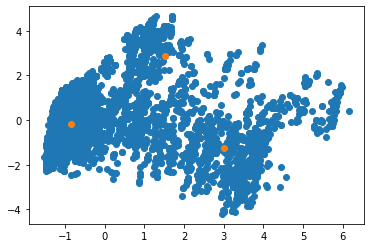

In [55]:
all_data = X_principal.values
 
# Plotting the results
plt.scatter(all_data[:,0] , all_data[:,1])
plt.scatter(cs[:,0], cs[:,1])
plt.show()

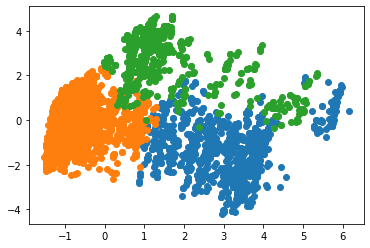

In [56]:
filtered_label0 = X_principal[y_km == 0].values
filtered_label01 = X_principal[y_km == 1].values
filtered_label02 = X_principal[y_km == 2].values

# Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label01[:,0] , filtered_label01[:,1])
plt.scatter(filtered_label02[:,0] , filtered_label02[:,1])

plt.show()

In [57]:
score = silhouette_score(X_principal, km.labels_, metric='euclidean')


# Printing the Silhouette Score

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.246


In [58]:
#------------
#Reference(1)
#------------

spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')

In [59]:
labels_nn = spectral_model_nn.fit_predict(X_principal)

C:\Users\Saul\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


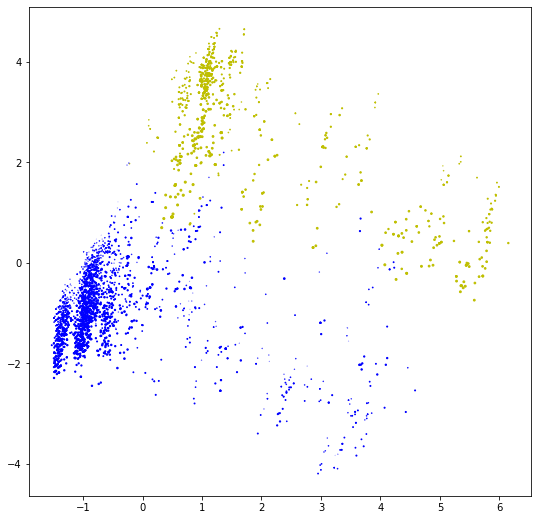

In [60]:
#------------
#Reference(2)
#------------


colours = {}
colours[0] = 'b'
colours[1] = 'y'
colours[2] = 'r'

cvec = [colours[label] for label in labels_nn]

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], c = cvec)
plt.show()


The follow code below are series of tests and attempts our group used to try and improve our training and test scores. Each block of code will be labeled with a Reference(#) which these reference numbers will be included as comments throughout live blocks so viewers can compare and get a better understanding of the steps that were taken during this project.

In [61]:
#------------
#Reference(1)

#Orginally we tested our spectral clustering using two different clusters (Two Principle componets), but changed to three to improve our Silloute Score.
#------------

# spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
  
# labels_rbf = spectral_model_rbf.fit_predict(X_principal)

In [62]:
#------------
#Reference(2)


#This block of code was us testing out spectral clustering, we used this reference to intially test our using two principle componets, seeing the effect on the visual
#and eventually added another componet.
#------------

# colours = {}
# colours[0] = 'b'
# colours[1] = 'y'
  
# # Building the colour vector for each data point
# cvec = [colours[label] for label in labels_rbf]
  
# # Plotting the clustered scatter plot
  
# b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
# y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
# plt.figure(figsize =(9, 9))
# plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
# plt.legend((b, y), ('Label 0', 'Label 1'))
# plt.show()
 


In [ ]:
#------------
#Reference(3)


#Orginally when cleaning up our data and determining a way to reduce multicolinearlity, we experimented with removing columns from the view of our dataframe
#Even though we managed to reduce the overall VIF of our data, removing these columns do not help due to the high-correlation between the different features.
#------------


# # df2 = df.drop(df['port'])
# df2 = df
# df2 = df.loc[:, df2.columns != 'port']
# df2 = df2.loc[:, df2.columns != 'popUpWidnow']
# df2 = df2.loc[:, df2.columns != 'Shortining_Service']
# df2 = df2.loc[:, df2.columns != 'double_slash_redirecting']
# df2 = df2.loc[:, df2.columns != 'RightClick']
# df2 = df2.loc[:, df2.columns != 'Iframe']
# df2 = df2.loc[:, df2.columns != 'on_mouseover']
# df2 = df2.loc[:, df2.columns != 'HTTPS_token']
# df2 = df2.loc[:, df2.columns != 'Abnormal_URL']



# data_mat2 = df2.values

# X2 = data_mat2[:,0:-1]
# y2 = data_mat2[:,-1]
# X_train2, X_test2, y_train2, y_test2  = train_test_split(X2, y2, test_size=0.3, random_state=100)


# scaler2 = MinMaxScaler()
# scaler2.fit(X_train2)
# X_train_n2 = scaler2.transform(X_train2)
# X_test_n2 = scaler2.transform(X_test2)


# lrc2 = LogisticRegression(max_iter=10000)
# lrc2.fit(X_train_n2, y_train2)

In [ ]:
#------------
#Reference(3)


#Orginally when cleaning up our data and determining a way to reduce multicolinearlity, we experimented with removing columns from the view of our dataframe
#Even though we managed to reduce the overall VIF of our data, removing these columns do not help due to the high-correlation between the different features.
#Here is the block of code we ran to determine our VIF values, orginally they were all extremly high and none of the features were = 1 as they are now.
#------------

# vif2_data = pd.DataFrame()
# vif2_data["feature"] = df2.columns
  
# # calculating VIF for each feature
# vif2_data["VIF"] = [variance_inflation_factor(df2.values, i)
#                           for i in range(len(df2.columns))]

# vif2_data

In [ ]:
#------------
#Reference(4)


#Orginally we were recieving a test/training score of around 40-50 which is just awful. These were some of the originaly variables we worked with which we ended up switching
#to variables which are fitted with PCA.
#------------

# print ("Train Accuracy 2: "+ str(100 * lrc2.score(X_train2, y_train2)))
# print ("Test Accuracy 2: "+ str(100 * lrc2.score(X_test2, y_test2)))

In [ ]:
#------------
#Reference(5)


#Similar to the results of the training and testing average, our confusion matrix and classification report were reference variables that did not use PCA orginally,
#We ended up switching over to X_principle and X_test which were fitted with PCA.
#------------

# y_pred2 = lrc2.predict(X_test_n2)
# print("Confusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
# class_report2 = classification_report(y_test2, y_pred2)
# print(class_report2)